### Bayesian Practice with wine quality Data set 



Data available at 

https://archive.ics.uci.edu/ml/datasets/Wine+Quality



In [1]:
import pandas as pd 
import numpy as np 
import sklearn as sk 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 10.0)

In [2]:
red_wine_raw = pd.read_csv("winequality-red.csv",sep = ';' )
red_wine_raw.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
red_wine_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


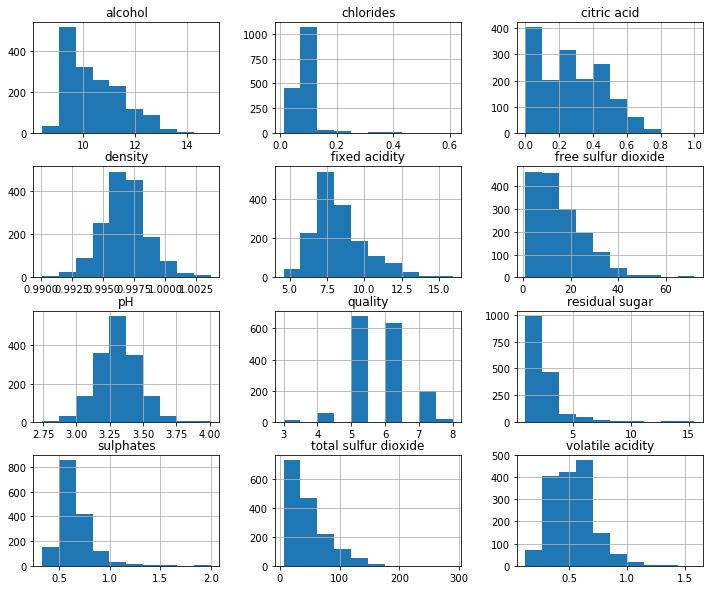

In [4]:
red_wine_raw.hist()
plt.show()

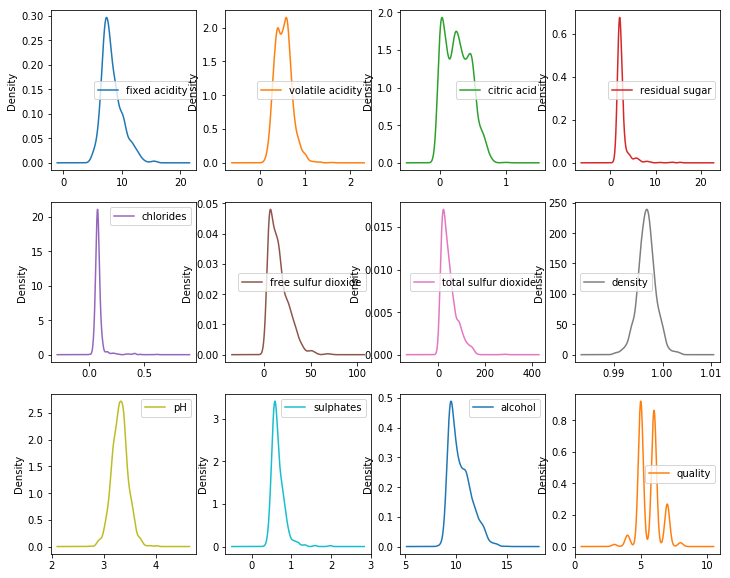

In [5]:
red_wine_raw.plot(kind = 'density',subplots = True, layout =(3,4), sharex = False )
plt.show()

## Pre processing 

We will start by turning finding the average wine quality ranking and making the categorical quality into a binary variable 

In [6]:
qual_mean = red_wine_raw["quality"].mean()
qual_count_low = red_wine_raw[red_wine_raw["quality"] < qual_mean].count()[1]
qual_count_high = red_wine_raw[red_wine_raw["quality"] > qual_mean].count()[1]

In [7]:
print("The average quality is ", qual_mean)
print("The number of low's are ", qual_count_low) 
print("The number of high's are ", qual_count_high)
print("The ratio of high to low's are ", qual_count_high/qual_count_low)

The average quality is  5.6360225140712945
The number of low's are  744
The number of high's are  855
The ratio of high to low's are  1.14919354839


Let's make the binary variable 

In [8]:
from sklearn.preprocessing import Binarizer

In [9]:
binarizer1 = Binarizer(threshold=qual_mean)
red_wine_raw["Quality_binary"] = binarizer1.transform(red_wine_raw["quality"]).transpose()

C:\Users\board\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [10]:
# Check number of catefory labeled as 1  
red_wine_raw[red_wine_raw["Quality_binary"]==1].count()[1]

855

In [11]:
red_wine_raw.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Quality_binary'],
      dtype='object')

In [12]:
X = red_wine_raw.drop(['quality', 'Quality_binary'], axis = 1)
X['intercept'] = 1.0
Y = red_wine_raw.Quality_binary

### Standard Linear Regression  
Let's do a standard linear regression to get our basics down.  
We will then have an idea for the which variables are important and potentially a range for the betas 

In [13]:
import statsmodels.discrete.discrete_model as sm

logit = sm.Logit(Y, X).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.517706
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         Quality_binary   No. Observations:                 1599
Model:                          Logit   Df Residuals:                     1587
Method:                           MLE   Df Model:                           11
Date:                Tue, 10 Oct 2017   Pseudo R-squ.:                  0.2505
Time:                        23:00:41   Log-Likelihood:                -827.81
converged:                       True   LL-Null:                       -1104.5
                                        LLR p-value:                1.316e-111
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.1360      0.098      1.381      0.167      -0.057       0.329
volatile acidity        -3.2817      0.488     -6.722      0.000      -4.239      -2.325
citric acid             -1.2743      0.563     -2.265      0.024      -2.377      -0.171
residual sugar           0.0553      0.054      1.029      0.304      -0.050       0.161
chlorides               -3.9157      1.569     -2.495      0.013      -6.992      -0.840
free sulfur dioxide      0.0222      0.008      2.698      0.007       0.006       0.038
total sulfur dioxide    -0.0164      0.003     -5.688      0.000      -0.022      -0.011
density                -50.9324     81.151     -0.628      0.530    -209.985     108.120
pH                      -0.3806      0.720     -0.528      0.597      -1.792       1.031
sulphates                2.7951      0.452      6.181      0.000       1.909       3.681
alcohol                  0.8668      0.104      8.319      0.000       0.663       1.071
intercept               42.9499     79.476      0.540      0.589    -112.820     198.720
========================================================================================
"""

In [14]:
round(logit.pvalues,4)*100

fixed acidity           16.74
volatile acidity         0.00
citric acid              2.35
residual sugar          30.35
chlorides                1.26
free sulfur dioxide      0.70
total sulfur dioxide     0.00
density                 53.02
pH                      59.72
sulphates                0.00
alcohol                  0.00
intercept               58.89
dtype: float64

In [15]:
logit_table1 = logit.summary().tables[1]
logit_table1

,coef,std err,z,P>|z|,[0.025,0.975]
fixed acidity,0.1360,0.098,1.381,0.167,-0.057,0.329
volatile acidity,-3.2817,0.488,-6.722,0.000,-4.239,-2.325
citric acid,-1.2743,0.563,-2.265,0.024,-2.377,-0.171
residual sugar,0.0553,0.054,1.029,0.304,-0.050,0.161
chlorides,-3.9157,1.569,-2.495,0.013,-6.992,-0.840
free sulfur dioxide,0.0222,0.008,2.698,0.007,0.006,0.038
total sulfur dioxide,-0.0164,0.003,-5.688,0.000,-0.022,-0.011
density,-50.9324,81.151,-0.628,0.530,-209.985,108.120
pH,-0.3806,0.720,-0.528,0.597,-1.792,1.031
sulphates,2.7951,0.452,6.181,0.000,1.909,3.681


In [16]:
def fix_sm_table(sm_logit_table):
    """ This function turns a Simple Object from Stats model into a pandas table  
    Main usage is intended for the results of a logistic regression """
    pd_table = pd.DataFrame(sm_logit_table.data)
    try:
        pd_table = np.float64(pd_table)
    except :
        print("Could not convert entire table to float64")
    new_header = pd_table.iloc[0]
    new_index = pd_table.loc[:,0]
    pd_table = pd_table.loc[1:,1:]
    pd_table.columns = new_header[1:]
    pd_table.index = new_index[1:]
   
    return pd_table

In [17]:
prac2 = fix_sm_table(logit_table1)

Could not convert entire table to float64


In [18]:
fix_sm_table(logit.summary().tables[0])

Could not convert entire table to float64


,Quality_binary,No. Observations:,1599
0,,,
Model:,Logit,Df Residuals:,1587
Method:,MLE,Df Model:,11
Date:,"Tue, 10 Oct 2017",Pseudo R-squ.:,0.2505
Time:,23:00:41,Log-Likelihood:,-827.81
converged:,True,LL-Null:,-1104.5
,,LLR p-value:,1.316e-111


In [19]:
good_vars_tbl = prac2.loc[np.float64(prac2['P>|z|']) < 0.05]
good_vars_tbl

,coef,std err,z,P>|z|,[0.025,0.975]
0,,,,,,
volatile acidity,-3.2817,0.488,-6.722,0.000,-4.239,-2.325
citric acid,-1.2743,0.563,-2.265,0.024,-2.377,-0.171
chlorides,-3.9157,1.569,-2.495,0.013,-6.992,-0.840
free sulfur dioxide,0.0222,0.008,2.698,0.007,0.006,0.038
total sulfur dioxide,-0.0164,0.003,-5.688,0.000,-0.022,-0.011
sulphates,2.7951,0.452,6.181,0.000,1.909,3.681
alcohol,0.8668,0.104,8.319,0.000,0.663,1.071


We want the coefficients where the probability of the z value is less than 5% (0.05) 

In [20]:
good_vars_names = good_vars_tbl.index

In [21]:
good_vars_names

Index(['volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'sulphates', 'alcohol'],
      dtype='object', name=0)

In [22]:
X_mod2 = X[good_vars_names]
X_mod2['intercept'] = 1.0

C:\Users\board\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [23]:
X_mod2.head()

,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,intercept
0,0.70,0.00,0.076,11.0,34.0,0.56,9.4,1.0
1,0.88,0.00,0.098,25.0,67.0,0.68,9.8,1.0
2,0.76,0.04,0.092,15.0,54.0,0.65,9.8,1.0
3,0.28,0.56,0.075,17.0,60.0,0.58,9.8,1.0
4,0.70,0.00,0.076,11.0,34.0,0.56,9.4,1.0


In [24]:
logit_mod = sm.Logit(Y, X_mod2).fit()
logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.520374
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         Quality_binary   No. Observations:                 1599
Model:                          Logit   Df Residuals:                     1591
Method:                           MLE   Df Model:                            7
Date:                Tue, 10 Oct 2017   Pseudo R-squ.:                  0.2466
Time:                        23:00:41   Log-Likelihood:                -832.08
converged:                       True   LL-Null:                       -1104.5
                                        LLR p-value:                1.840e-113
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile acidity        -3.0923      0.456     -6.775      0.000      -3.987      -2.198
citric acid             -0.3031      0.405     -0.748      0.454      -1.097       0.491
chlorides               -4.1866      1.467     -2.854      0.004      -7.061      -1.312
free sulfur dioxide      0.0226      0.008      2.767      0.006       0.007       0.039
total sulfur dioxide    -0.0171      0.003     -6.178      0.000      -0.023      -0.012
sulphates                2.7402      0.432      6.349      0.000       1.894       3.586
alcohol                  0.8643      0.071     12.142      0.000       0.725       1.004
intercept               -8.0594      0.819     -9.845      0.000      -9.664      -6.455
========================================================================================
"""

Should drop Citric acid but let's keep it for now 

In [25]:
good_vars_tbl_mod = logit_mod.summary().tables[1]

In [26]:
good_vars_tbl

,coef,std err,z,P>|z|,[0.025,0.975]
0,,,,,,
volatile acidity,-3.2817,0.488,-6.722,0.000,-4.239,-2.325
citric acid,-1.2743,0.563,-2.265,0.024,-2.377,-0.171
chlorides,-3.9157,1.569,-2.495,0.013,-6.992,-0.840
free sulfur dioxide,0.0222,0.008,2.698,0.007,0.006,0.038
total sulfur dioxide,-0.0164,0.003,-5.688,0.000,-0.022,-0.011
sulphates,2.7951,0.452,6.181,0.000,1.909,3.681
alcohol,0.8668,0.104,8.319,0.000,0.663,1.071


In [27]:
good_vars_tbl_mod

,coef,std err,z,P>|z|,[0.025,0.975]
volatile acidity,-3.0923,0.456,-6.775,0.000,-3.987,-2.198
citric acid,-0.3031,0.405,-0.748,0.454,-1.097,0.491
chlorides,-4.1866,1.467,-2.854,0.004,-7.061,-1.312
free sulfur dioxide,0.0226,0.008,2.767,0.006,0.007,0.039
total sulfur dioxide,-0.0171,0.003,-6.178,0.000,-0.023,-0.012
sulphates,2.7402,0.432,6.349,0.000,1.894,3.586
alcohol,0.8643,0.071,12.142,0.000,0.725,1.004
intercept,-8.0594,0.819,-9.845,0.000,-9.664,-6.455


In [28]:
good_vars_mod_pd = fix_sm_table(good_vars_tbl_mod)
good_vars_mod_pd

Could not convert entire table to float64


,coef,std err,z,P>|z|,[0.025,0.975]
0,,,,,,
volatile acidity,-3.0923,0.456,-6.775,0.000,-3.987,-2.198
citric acid,-0.3031,0.405,-0.748,0.454,-1.097,0.491
chlorides,-4.1866,1.467,-2.854,0.004,-7.061,-1.312
free sulfur dioxide,0.0226,0.008,2.767,0.006,0.007,0.039
total sulfur dioxide,-0.0171,0.003,-6.178,0.000,-0.023,-0.012
sulphates,2.7402,0.432,6.349,0.000,1.894,3.586
alcohol,0.8643,0.071,12.142,0.000,0.725,1.004
intercept,-8.0594,0.819,-9.845,0.000,-9.664,-6.455


In [29]:
# TODO: only need coed and std % changes, check for column and index matches 
temp_mod_df = good_vars_mod_pd.drop(["intercept"], axis = 0)
result_data = (np.float64(good_vars_tbl) - np.float64(temp_mod_df))/np.float64(good_vars_tbl) 
result_df = pd.DataFrame(data = result_data, columns = good_vars_tbl.columns, index = good_vars_tbl.index)
result_df

C:\Users\board\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


,coef,std err,z,P>|z|,[0.025,0.975]
0,,,,,,
volatile acidity,0.057714,0.065574,-0.007885,NaN,0.059448,0.054624
citric acid,0.762144,0.280639,0.669757,-17.916667,0.538494,3.871345
chlorides,-0.069183,0.065010,-0.143888,0.692308,-0.009868,-0.561905
free sulfur dioxide,-0.018018,0.000000,-0.025574,0.142857,-0.166667,-0.026316
total sulfur dioxide,-0.042683,0.000000,-0.086146,NaN,-0.045455,-0.090909
sulphates,0.019642,0.044248,-0.027180,NaN,0.007858,0.025808
alcohol,0.002884,0.317308,-0.459550,NaN,-0.093514,0.062558


# Start Bayesian Analysis  

In [30]:
import pymc3 as pm

In [31]:
good_vars_mod_pd

,coef,std err,z,P>|z|,[0.025,0.975]
0,,,,,,
volatile acidity,-3.0923,0.456,-6.775,0.000,-3.987,-2.198
citric acid,-0.3031,0.405,-0.748,0.454,-1.097,0.491
chlorides,-4.1866,1.467,-2.854,0.004,-7.061,-1.312
free sulfur dioxide,0.0226,0.008,2.767,0.006,0.007,0.039
total sulfur dioxide,-0.0171,0.003,-6.178,0.000,-0.023,-0.012
sulphates,2.7402,0.432,6.349,0.000,1.894,3.586
alcohol,0.8643,0.071,12.142,0.000,0.725,1.004
intercept,-8.0594,0.819,-9.845,0.000,-9.664,-6.455


In [63]:
basic_model = pm.Model()

with basic_model: 
    
    # Priors 
    intercept = pm.Normal('intercept', mu = 0, sd = 10)
    beta_va = pm.Normal('vol_acidity', mu = 0, sd = 10)
    beta_ca = pm.Normal('citric_acid', mu = 0, sd = 10)
    beta_sul_diox = pm.Normal('free/total sulfur dioxide', mu = 0, sd = 10
                              , shape = 2) # 2 parameters defined
    beta_sulphates = pm.Normal('sulphates', mu = 0, sd = 10)
    beta_alcohol = pm.Normal('alcohol', mu = 0, sd = 10)
    beta_chlorides = pm.Normal('chlorides', mu = 0, sd = 10)
    
    # Expected Mean equation 
    p_equ = beta_va * red_wine_raw['volatile acidity'].values \
    + beta_ca * red_wine_raw['citric acid'].values\
    + beta_chlorides * red_wine_raw['chlorides'].values \
    + beta_sul_diox[0] * red_wine_raw['free sulfur dioxide'].values \
    + beta_sul_diox[1] * red_wine_raw['total sulfur dioxide'].values \
    + beta_sulphates * red_wine_raw['sulphates'].values \
    + beta_alcohol * red_wine_raw['alcohol'].values \
    + intercept

    # Logistic equation
    p_x = np.exp(p_equ)/(1+np.exp(p_equ))
    
    # Likelihood 
    Y_obs = pm.Bernoulli('Y_obs', p = p_x, observed = red_wine_raw.Quality_binary.values)
    
    # Sampler
    trace = pm.sample(7000)    
    

100%|███████████████████████████████████▉| 50499/50500 [54:34<00:00, 15.42it/s]C:\Users\board\Anaconda3\lib\site-packages\pymc3\step_methods\hmc\nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.880997929854, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|████████████████████████████████████| 50500/50500 [54:34<00:00, 15.42it/s]


In [65]:
# Useful for checking things out 
for RV in basic_model.basic_RVs:
    print(RV.name, RV.logp(basic_model.test_point))

intercept -3.2215236261987186
vol_acidity -3.2215236261987186
citric_acid -3.2215236261987186
free/total sulfur dioxide -6.443047252397437
sulphates -3.2215236261987186
alcohol -3.2215236261987186
chlorides -3.2215236261987186
Y_obs -1108.3423417153065


### Analyze results of the (?) MCMC  
Check 2 versions of MAP (Maximum A-priori Posterior)  
We can compare the MAP estimates with the results from the linear regression  
Examine traceplots 

In [66]:
map_estimate = pm.find_MAP(model = basic_model)
map_estimate

logp = -858.35, ||grad|| = 2.2957: 100%|████| 138/138 [00:00<00:00, 628.56it/s]


{'alcohol': array(0.8611214034756796),
 'chlorides': array(-4.105313239979187),
 'citric_acid': array(-0.30741623002221424),
 'free/total sulfur dioxide': array([ 0.02257942, -0.01709912]),
 'intercept': array(-8.013121151588894),
 'sulphates': array(2.7182381827663926),
 'vol_acidity': array(-3.1009772961289546)}

In [67]:
good_vars_mod_pd

,coef,std err,z,P>|z|,[0.025,0.975]
0,,,,,,
volatile acidity,-3.0923,0.456,-6.775,0.000,-3.987,-2.198
citric acid,-0.3031,0.405,-0.748,0.454,-1.097,0.491
chlorides,-4.1866,1.467,-2.854,0.004,-7.061,-1.312
free sulfur dioxide,0.0226,0.008,2.767,0.006,0.007,0.039
total sulfur dioxide,-0.0171,0.003,-6.178,0.000,-0.023,-0.012
sulphates,2.7402,0.432,6.349,0.000,1.894,3.586
alcohol,0.8643,0.071,12.142,0.000,0.725,1.004
intercept,-8.0594,0.819,-9.845,0.000,-9.664,-6.455


### Use optimizer from Scipy  
Normally it uses Broyden–Fletcher–Goldfarb–Shanno (BFGS) optimization  
Let's try using Powell's 

In [68]:
from scipy import optimize 

In [69]:
map_estimate2 = pm.find_MAP(model= basic_model, fmin= optimize.fmin_powell)
map_estimate2

C:\Users\board\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:91: UserWarning: In future versions, set the optimization algorithm with a string. For example, use `method="L-BFGS-B"` instead of `fmin=sp.optimize.fmin_l_bfgs_b"`.
  warnings.warn('In future versions, set the optimization algorithm with a string. '
logp = -864.12:  30%|█████▉              | 1494/5000 [00:01<00:02, 1207.51it/s]

Optimization terminated successfully.
         Current function value: 864.117686
         Iterations: 17
         Function evaluations: 1494


{'alcohol': array(0.792510896422321),
 'chlorides': array(-3.3146545397158462),
 'citric_acid': array(-1.0336836479714353),
 'free/total sulfur dioxide': array([ 0.01689182, -0.01531619]),
 'intercept': array(-6.092170975793329),
 'sulphates': array(2.101023707781676),
 'vol_acidity': array(-4.37454703790126)}

In [70]:
good_vars_mod_pd

,coef,std err,z,P>|z|,[0.025,0.975]
0,,,,,,
volatile acidity,-3.0923,0.456,-6.775,0.000,-3.987,-2.198
citric acid,-0.3031,0.405,-0.748,0.454,-1.097,0.491
chlorides,-4.1866,1.467,-2.854,0.004,-7.061,-1.312
free sulfur dioxide,0.0226,0.008,2.767,0.006,0.007,0.039
total sulfur dioxide,-0.0171,0.003,-6.178,0.000,-0.023,-0.012
sulphates,2.7402,0.432,6.349,0.000,1.894,3.586
alcohol,0.8643,0.071,12.142,0.000,0.725,1.004
intercept,-8.0594,0.819,-9.845,0.000,-9.664,-6.455


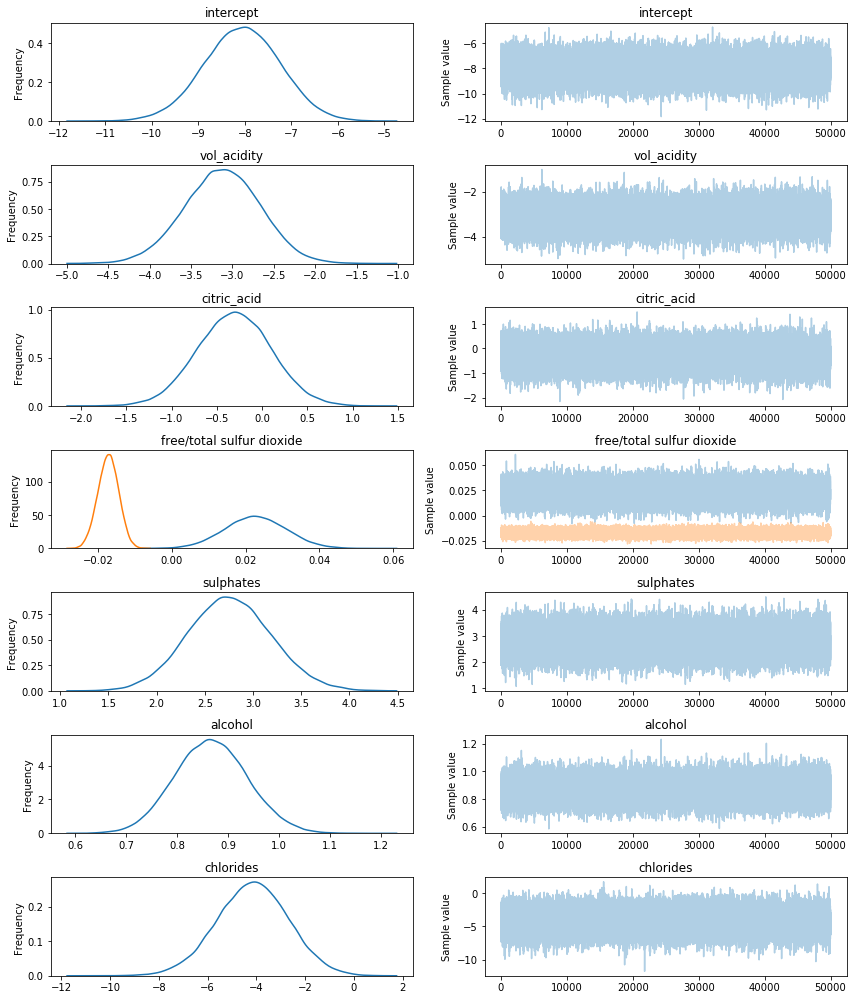

In [71]:
_ = pm.traceplot(trace)

In [72]:
pm.summary(trace)


intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -8.059           0.816            0.005            [-9.637, -6.435]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -9.681         -8.605         -8.053         -7.504         -6.472


vol_acidity:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -3.122           0.457            0.002            [-4.017, -2.228]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -4.028         -3.428         -3.118         -2.812         -2.238


citric_acid:

  Mean             SD               MC Error         95% HPD interval
  ---

Below is some script of an example that I found useful for understanding... can get rid of later if not needed  
Found when I was getting a "bad energy, model may be misspecified" error 

In [ ]:
loss_shifted40 = np.array([155, 267, 105, 223, 183, 189, 262, 178, 272, 187])
fem_cases = np.array([2, 2, 2, 3, 1, 0, 1, 0, 0, 0])
mz_freq = np.array([0.05, 0.047, 0.045, 0.063, 0.06, 0.062, 0.053, 0.057, 0.061, 0.058])

pp_mean = 0.0595759774518
N = 3392425
with pm.Model() as model:

    pp = pp_mean
    lower_beta = pm.Uniform("lower_beta", lower=0, upper=1)
    upper_beta = pm.Uniform("upper_beta", lower=lower_beta, upper=lower_beta+3)
    beta = pm.Uniform("beta", lower=lower_beta, upper=upper_beta, shape=len(fem_cases))

    beta_gamma = pm.Uniform("beta_gamma", lower=0, upper=120)
    alpha_gamma = pm.Uniform("alpha_gamma", lower=(2/3)*beta_gamma/7, upper=(4/3)*beta_gamma/7)
    gamma = pm.Gamma("gamma", alpha=alpha_gamma, beta=beta_gamma)
    
    I = pm.Uniform("I", lower=0, upper=fem_cases.sum(), shape=len(fem_cases))
    R = pm.Deterministic("R", (gamma*I))
    S = pm.Uniform("S", lower=0, upper=N-(I+R), shape=len(fem_cases))

    inc = pm.Deterministic("inc", beta*I*(S)/(S+I+R)-R)
    
    po = pm.Uniform("po", lower=0, upper=1)
 
    Y = pm.Poisson('Y', mu=inc, shape=len(fem_cases))

    mu_Yp = pm.Deterministic("mu_Yp", var=Y*pp)
    
    Yp = pm.Poisson("Yp", mu=mu_Yp, shape=len(fem_cases), testval=loss_shifted40+1000)

    Yo = pm.Binomial('Yo', n=Y, p=po, observed=fem_cases)    

    M = pm.Binomial("M", n=Yp, p=mz_freq, observed=loss_shifted40)
    
    trace = pm.sample(1e4)

In [ ]:
_ = pm.traceplot(trace)

In [ ]:
pm.summary(trace)